In [1]:
import torch
from torchvision import transforms
from torchvision import datasets
from ModelToys import LinearModel
from torch.utils.data import DataLoader
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#transforms.ToTensor(1)
# TypeError: __init__() takes 1 positional argument but 3 were given
# 注意看， ToTensor是一个class，__init__只接收一个参数。默认会把自己当作self传入，如果再传1，就是给了2个参数


TypeError: __init__() takes 1 positional argument but 2 were given

In [3]:
norm_transform = \
    transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# prepare data
train_data = datasets.MNIST("../data/", train=True, transform=norm_transform, download=False)
test_data_xy = datasets.MNIST("../data/", train=False, transform=norm_transform, download=False)
print(len(train_data))
print(train_data[0])
datasize = len(train_data)

60000
(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4

In [4]:
batch_size = 500
train_data_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=4)
test_data_loader = DataLoader(dataset=test_data_xy, shuffle=True, num_workers=0)

In [5]:
# build model
model = LinearModel()

In [6]:
optim_f = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
loss_f = torch.nn.CrossEntropyLoss(size_average=True)


/root/miniconda3/envs/demo/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [7]:
epoch = 200
loss_history = []
for i in range(epoch):
    curr_loss = 0
    for idx, data in enumerate(train_data_loader):
        data, target = data
        print(data.__class__)
        data = data.view(-1, 28 * 28)
        print("x=", data.shape)
        y_pred = model.forward(data)
        optim_f.zero_grad()
        loss = loss_f(y_pred, target)
        curr_loss = loss.item()
        loss.backward()
        optim_f.step()
        clear_output()
    loss_history.append(curr_loss)



[2.2897214889526367, 2.2613131999969482, 2.1472578048706055, 1.9334559440612793, 1.7182074785232544, 1.449401617050171, 1.3110811710357666, 1.3205374479293823, 1.191536545753479, 1.2717326879501343, 1.2375766038894653, 1.247071623802185, 1.1913270950317383, 1.0856754779815674, 1.0595834255218506, 1.1260203123092651, 1.0656358003616333, 1.1392838954925537, 1.0535764694213867, 1.0422621965408325, 1.042209267616272, 1.0859370231628418, 0.9463149309158325, 0.9978502988815308, 0.9752833843231201, 1.0806690454483032, 1.1067737340927124, 1.160133719444275, 1.0310076475143433, 1.0551739931106567, 1.0635074377059937, 1.0029587745666504, 0.9115800261497498, 1.1287869215011597, 1.0135574340820312, 0.9471942782402039, 1.077749490737915, 1.0493077039718628, 0.9967517852783203, 0.9655898809432983, 1.0879355669021606, 1.01244056224823, 1.0510865449905396, 1.0097401142120361, 1.1295359134674072, 0.9511749744415283, 0.895975649356842, 0.918213427066803, 1.0467629432678223, 0.9462149739265442, 1.0007510

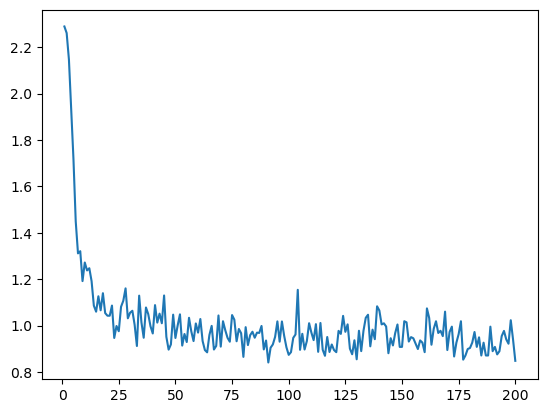

In [8]:
iteration = int(datasize / batch_size)

x = np.linspace(1, epoch, epoch)
print(loss_history)

plt.plot(x, loss_history)